# Task 1: Introduction

Creat, Train, and Evaluat a Neural Network model that will be able to predict digits from hand-written images with a high degree of accuracy.+



### Import TensorFlow

In [2]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.6.0


# Task 2: The Dataset
### Import MNIST

In [3]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [4]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


### Plot an Image Example

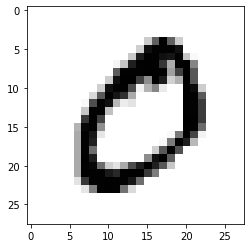

In [5]:
from matplotlib import pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

plt.imshow(x_train[1],cmap='binary')
plt.show()


### Display Labels

In [6]:
print(y_train[1])



0


In [7]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding


### Encoding Labels

In [8]:
from tensorflow.keras.utils import to_categorical 

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

### Validated Shapes

In [9]:
print('y_train_encoded shape: ',y_train_encoded.shape)
print('y_test_encoded shape: ',y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Display Encoded Labels

In [10]:
print(y_train_encoded[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Task 4: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [11]:
import numpy as np

x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

print("x_train_reshaped shape: ",x_train_reshaped.shape)
print("x_test_reshaped shape: ",x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


### Display Pixel Values

In [12]:
print(set(x_train_reshaped[1]))


{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


### Data Normalization

In [13]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon =1e-10

x_train_norm=(x_train_reshaped - x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped - x_mean)/(x_std+epsilon)


### Display Normalized Pixel Values

In [14]:
print(set(x_train_norm[0]))


{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 5: Creating a Model
### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model= Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
     Dense(128,activation='relu'),
      Dense(10,activation='softmax')
    ])



### Compiling the Model

In [16]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


# Task 7: Training the Model

### Training the Model

In [17]:
model.fit(x_train_norm,y_train_encoded,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3666 - accuracy: 0.8931
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1842 - accuracy: 0.9461
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9594


### Evaluating the Model

In [18]:
_,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('test set accuracy: ',accuracy*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1322 - accuracy: 0.9595
test set accuracy:  95.95000147819519


# Task 8: Predictions

### Predictions on Test Set

In [19]:
preds=model.predict(x_test_norm)
print('shape of preds: ',preds.shape)

plt.figure(figsize=(12,12))

shape of preds:  (10000, 10)


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

### Plotting the Results

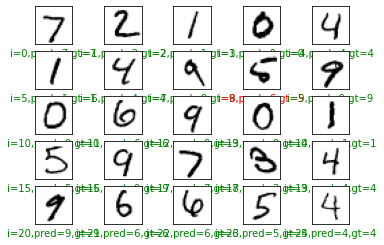

In [20]:
start_index=0

for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred != gt:
        col='r'
    
    plt.xlabel('i={},pred={},gt={}' .format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
        


In [21]:
plt.show()
